In [1]:
import snap
import sys
import numpy as np
import networkx as nx
import sklearn.cluster
sys.path.append('..')
sys.path.append('../src/data_cleaning/snair')
from clean_am import *
from src.util import run_rolx_iteration, get_basic_feature, get_pos
import matplotlib.pyplot as plt

In [2]:
G_Mes = snap.LoadEdgeList(snap.PUNGraph, "../data/Edgelist_v2/Mesentery_clean_EdgeList.txt", 0, 1, ' ')
G_LS174T = snap.LoadEdgeList(snap.PUNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1, '\t')
G_SW1222 = snap.LoadEdgeList(snap.PUNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1, '\t')

In [19]:
features = snap.TIntFltVH()
for node in G_Mes.Nodes():
    features[node.GetId()] = get_basic_feature(G_Mes, node.GetId())
for k in range(2):
    features = run_rolx_iteration(G_Mes, features)
features_Mes = np.vstack([np.asarray(feature) for feature in features])

In [3]:
features = snap.TIntFltVH()
for node in G_LS174T.Nodes():
    features[node.GetId()] = get_basic_feature(G_LS174T, node.GetId())
for k in range(2):
    features = run_rolx_iteration(G_LS174T, features)
features_LS = np.vstack([np.asarray(feature) for feature in features])

In [4]:
features = snap.TIntFltVH()
for node in G_SW1222.Nodes():
    features[node.GetId()] = get_basic_feature(G_SW1222, node.GetId())
for k in range(2):
    features = run_rolx_iteration(G_SW1222, features)
features_SW = np.vstack([np.asarray(feature) for feature in features])

In [28]:
kmeans = sklearn.cluster.KMeans(n_clusters=5)
kmeans.fit(features_LS)
roles_LS = kmeans.labels_

In [29]:
kmeans.fit(features_Mes)
roles_Mes = kmeans.labels_

In [16]:
kmeans.fit(features_SW)
roles_SW = kmeans.labels_

In [17]:
G_LS174T = nx.read_edgelist("../data/Edgelist_v2/LS174T_clean_EdgesList.txt", nodetype=int)
G_SW1222 = nx.read_edgelist('../data/Edgelist_v2/SW1222_clean_EdgesList.txt', nodetype=int)

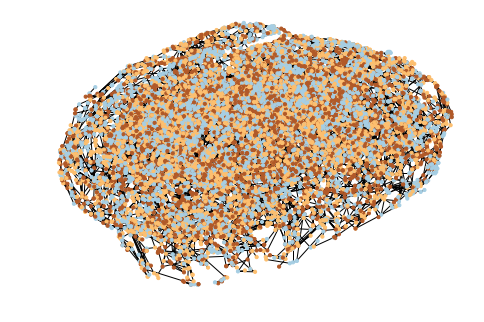

In [18]:
G_LS174T_nx = nx.read_edgelist("../data/Edgelist_v2/LS174T_clean_EdgesList.txt", nodetype=int)
LS174T_pos = get_pos('../data/og_files/LS174T_spatialGraph_RIN.txt')
# print(LS174T_pos)
nx.draw(G_LS174T_nx, node_color=roles_LS, pos = LS174T_pos, node_size=10, cmap=plt.cm.Paired)

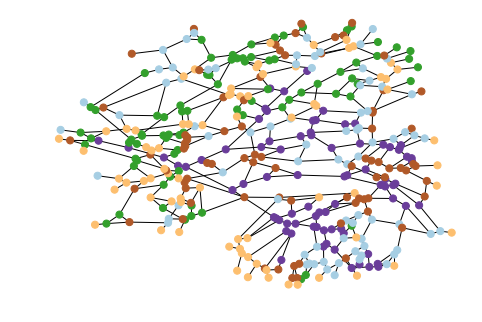

In [30]:
G_Mes_nx = nx.read_edgelist("../data/Edgelist_v2/Mesentery_clean_EdgeList.txt", nodetype=int)
Mes_pos = get_pos('m_coordinates.txt', small = True)
# print(LS174T_pos)
nx.draw(G_Mes_nx, node_color=roles_Mes, pos = Mes_pos, node_size=50, cmap=plt.cm.Paired)